# EQUIPO RIGNON

## 1. Importar librerías a utilizar en el análisis de datos y visualización

In [3]:
#Librerías de análisis y visualización de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy import stats
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

## 2. Descripción de las variables:

Estas son las variables que se utilizarán:

+ **gender:** Indica el genero del paciente
+ **age:** Indica la edad del paciente
+ **hypertension:** Indica si el paciente padece o no de hipertensión
+ **heart_disease:** Indica si el paciente padece o no de enfermedad cardiaca
+ **ever_married:** Indica si el paciente ha estado o no casado
+ **work_type:** Indica el tipo de empleo que desarrolla el paciente
+ **Residence_type:** Indica el tipo de vivienda en el que reside el paciente
+ **avg_glucose_level:** Indica el nivel de glucosa media estimada del paciente
+ **bmi:** Indica el indice de masa corporal que tiene el paciente
+ **smoking_status:** Indica si el paciente es o ha sido fumador
+ **stroke:** Indica si el paciente ha sufrido un accidente cerebrovascular o ataque cerebral

## 3. Exploración inicial de datos

In [4]:
#Se lee csv
df = pd.read_csv ('/kaggle/input/full-filled-brain-stroke-dataset/full_data.csv')

In [5]:
#Cantidad de entradas y columnas del dataset.
df.shape

(4981, 11)

In [6]:
#Información sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
# Vemos las primeras cinco entradas.
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [8]:
#Visualizamos si contamos con datos nulos
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

No existen valores nulos, pero tenemos valores raros que analizaremos. 

In [9]:
#Observamos que en la variable Edad tenemos pacientes menores de 2 años.
(df[df['age']<2]).age.value_counts()

1.80    9
1.32    8
1.64    8
1.08    7
1.88    7
1.24    7
1.48    6
1.72    6
0.32    5
1.00    5
0.56    5
0.24    5
0.88    5
0.72    5
0.64    4
1.56    4
0.80    4
1.40    3
1.16    3
0.48    3
0.40    2
0.08    2
0.16    1
Name: age, dtype: int64

+ Para niños menores a 2 años se tiene en cuenta los meses de vida de estos
+ Contamos con 114 pacientes menores de 2 años

In [10]:
#Verificamos si alguno sufrio de un ictus
len(df[(df['age']<2) & (df['stroke']==1)])

1

- Se identifica a un niño que tuvo un ictus pediátrico

In [11]:
#Se hace un conteo de valores con los que se encuentran casados
df.ever_married.value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [12]:
#Lo visualizamos en un gráfico
fig = px.bar((df['ever_married'].value_counts()).to_frame(name="count"), y="count", title="Pacientes que se encuentran casados", )
fig.show()

In [13]:
#Se hace un conteo con los tipos de trabajo de los pacientes
df.work_type.value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [14]:
#Lo visualizamos en un gráfico
fig = px.bar((df['work_type'].value_counts()).to_frame(name="count"), y="count", title="Tipos de trabajo", )
fig.show()

In [15]:
#Se hace un conteo con los tipos de residencia de los pacientes.
df.Residence_type.value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [16]:
#Lo visualizamos en un gráfico
fig = px.bar((df['Residence_type'].value_counts()).to_frame(name="count"), y="count", title="Tipos de residencia", )
fig.show()

In [17]:
#Se hace un conteo del status de fumador de los pacientes
df.smoking_status.value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [18]:
#Lo visualizamos en un gráfico
fig = px.bar((df['smoking_status'].value_counts()).to_frame(name="count"), y="count", title="Status de fumador", )
fig.show()

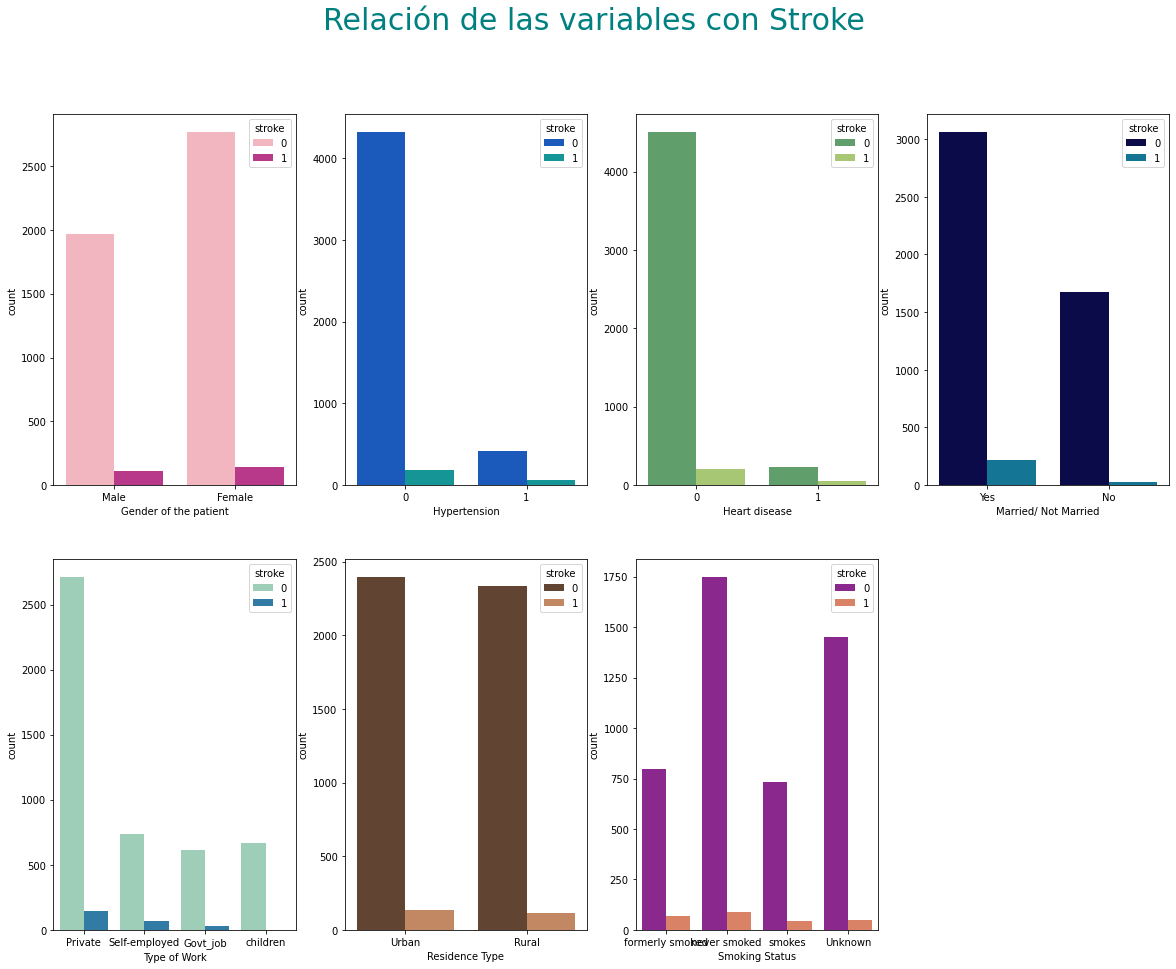

In [19]:
#Se crea un grafico para visualizar de manera simultanea todas las variables en relacion a stroke
fig, ax = plt.subplots(2, 4, figsize = (20, 15))
ax[1, 3].axis('off')

plt.suptitle('Relación de las variables con Stroke', fontsize = 30, color = 'teal')

ax1 = sns.countplot(x ='gender', data= df, hue= 'stroke', ax= ax[0, 0], palette= 'RdPu')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='hypertension', data= df, hue= 'stroke', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Hypertension')

ax3 = sns.countplot(x ='heart_disease', data= df, hue= 'stroke', ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Heart disease')

ax4 = sns.countplot(x ='ever_married', data= df, hue= 'stroke', ax= ax[0, 3], palette= 'ocean')
ax4.set(xlabel = 'Married/ Not Married')

ax5 = sns.countplot(x ='work_type', data= df, hue= 'stroke', ax= ax[1, 0], palette= 'YlGnBu')
ax5.set(xlabel = 'Type of Work')

ax6 = sns.countplot(x ='Residence_type', data= df, hue= 'stroke', ax= ax[1, 1], palette= 'copper')
ax6.set(xlabel = 'Residence Type')

ax7 = sns.countplot(x ='smoking_status', data= df, hue= 'stroke', ax= ax[1, 2], palette= 'plasma')
ax7.set(xlabel = 'Smoking Status')

plt.show()

In [20]:
#Revisando duplicados:
len(df[df.duplicated()])

0

No se encontraron duplicados en el dataset.

# 3. Ingeniería de características

In [21]:
# Buscamos los valores NaN:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Decidimos dejar la categoria "Unknown" que aparece en smoking_status, tambien a los pacientes con edad menor a 2 años

In [22]:
#Se analiza los datos
df.describe() 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [23]:
#Renombramos las variables gender y Residence_type.
df.rename(columns={'gender': 'female_gender'}, inplace=True)
df.rename(columns={'Residence_type': 'urban_residence'}, inplace=True)

In [24]:
#Despues de renombrarlas las pasamos a binarias, hacemos lo mismo con la variable ever_married.
df["female_gender"] = df["female_gender"].apply(lambda x: 1 if x == "Female" else 0)
df["urban_residence"] = df["urban_residence"].apply(lambda x: 1 if x == "Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x == "Yes" else 0)

In [25]:
#Convertimos las variables modificadas a integer. 
df["female_gender"] = df["female_gender"].astype(int)
df["ever_married"] = df["ever_married"].astype(int)
df["urban_residence"] = df["urban_residence"].astype(int)

In [26]:
#Lo visualizamos en el dataframe
df.head()

,female_gender,age,hypertension,heart_disease,ever_married,work_type,urban_residence,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1


In [27]:
#Obsevamos los cambios realizados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   female_gender      4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   object 
 6   urban_residence    4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 428.2+ KB


In [28]:
#Se analiza los datos con los nuevos valores
df.describe() 

,female_gender,age,hypertension,heart_disease,ever_married,urban_residence,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.583618,43.419859,0.096165,0.055210,0.658502,0.508332,105.943562,28.498173,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.499981,45.075373,6.790464,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.850000,28.100000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,113.860000,32.600000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [29]:
#Creamos dos variables para analizar mejor los casos de ictus en los pacientes
df_stroke = df[df['stroke']==1]
df_stroke_no = df[df['stroke']==0]

In [30]:
#Pacientes que han sufrido un ictus
df_stroke.describe()

,female_gender,age,hypertension,heart_disease,ever_married,urban_residence,avg_glucose_level,bmi,stroke
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.0
mean,0.564516,67.819839,0.266129,0.189516,0.883065,0.544355,132.175565,30.186694,1.0
std,0.496823,12.670565,0.442826,0.392711,0.321993,0.499036,61.771083,5.658245,0.0
min,0.000000,1.320000,0.000000,0.000000,0.000000,0.000000,56.110000,16.900000,1.0
25%,0.000000,59.000000,0.000000,0.000000,1.000000,0.000000,79.572500,26.975000,1.0
50%,1.000000,71.000000,0.000000,0.000000,1.000000,1.000000,105.040000,29.450000,1.0
75%,1.000000,78.000000,1.000000,0.000000,1.000000,1.000000,195.960000,32.650000,1.0
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,48.900000,1.0


In [31]:
#Lo visualizamos con los datos relevantes: edad, nivel de glucosa e imc.
df_stroke[['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,248.000000,248.000000,248.000000
mean,67.819839,132.175565,30.186694
std,12.670565,61.771083,5.658245
min,1.320000,56.110000,16.900000
25%,59.000000,79.572500,26.975000
50%,71.000000,105.040000,29.450000
75%,78.000000,195.960000,32.650000
max,82.000000,271.740000,48.900000


In [32]:
#Pacientes que no han sufrido un ictus
df_stroke_no.describe()

,female_gender,age,hypertension,heart_disease,ever_married,urban_residence,avg_glucose_level,bmi,stroke
count,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.000000,4733.0
mean,0.584619,42.141348,0.087260,0.048172,0.646736,0.506444,104.569056,28.409698,0.0
std,0.492840,22.345036,0.282245,0.214153,0.478034,0.500011,43.602188,6.833637,0.0
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.0
25%,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,77.120000,23.500000,0.0
50%,1.000000,43.000000,0.000000,0.000000,1.000000,1.000000,91.450000,28.000000,0.0
75%,1.000000,60.000000,0.000000,0.000000,1.000000,1.000000,112.620000,32.600000,0.0
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,267.760000,48.900000,0.0


In [33]:
#Lo visualizamos con los datos relevantes: edad, nivel de glucosa e imc.
df_stroke_no[['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,4733.000000,4733.000000,4733.000000
mean,42.141348,104.569056,28.409698
std,22.345036,43.602188,6.833637
min,0.080000,55.120000,14.000000
25%,24.000000,77.120000,23.500000
50%,43.000000,91.450000,28.000000
75%,60.000000,112.620000,32.600000
max,82.000000,267.760000,48.900000


In [34]:
#Lo visualizamos en un gráfico
fig = px.bar((df['stroke'].value_counts()).to_frame(name="count"), y="count", title="Pacientes con ictus", )
fig.show()

## 3.2. Detección de *Outliers*

* Outliers de edad

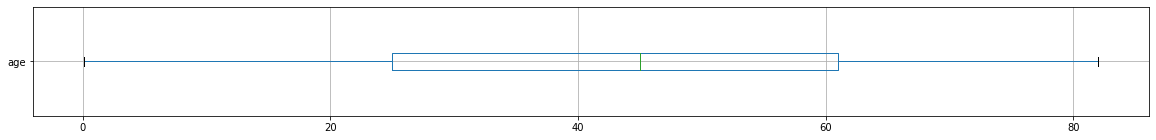

-Se detecta con Zscore > o < 3, valor de outliers para 'age' a partir de:


82.0

In [35]:
#Creamos un grafico para poder encontrar posibles outliers en la variable Edad.
df.boxplot(column='age', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > o < 3, valor de outliers para 'age' a partir de:")
df = df[(np.abs(stats.zscore(df["age"])) < 3)]
df['age'].max()

* Outliers de glucosa 

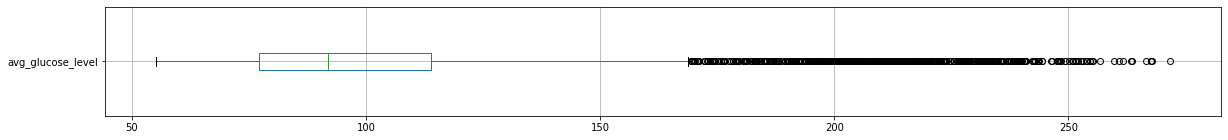

-Se detecta con Zscore > o < 3, valor de outliers para 'avg_glucose_level' a partir de:


240.86

In [36]:
#Creamos un grafico para poder encontrar posibles outliers en el nivel de glucosa.
df.boxplot(column='avg_glucose_level', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > o < 3, valor de outliers para 'avg_glucose_level' a partir de:")
df = df[(np.abs(stats.zscore(df["avg_glucose_level"])) < 3)]
df['avg_glucose_level'].max()

* Outliers de Masa Corporal

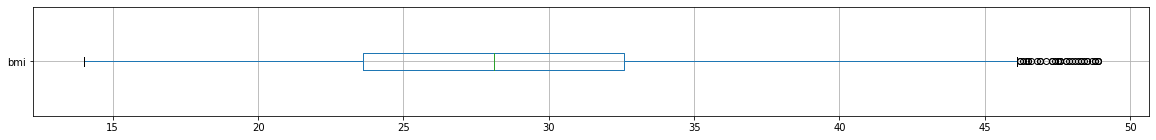

-Se detecta con Zscore > o < 3, valor de outliers para 'bmi' a partir de:


48.8

In [37]:
#Creamos un grafico para poder encontrar posibles outliers en el imc.
df.boxplot(column='bmi', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > o < 3, valor de outliers para 'bmi' a partir de:")
df = df[(np.abs(stats.zscore(df["bmi"])) < 3)]
df['bmi'].max()

In [38]:
#Se clasifican las variables numericas.
numericas = ["female_gender", "age", "hypertension", "heart_disease", "ever_married", "urban_residence", "avg_glucose_level", "bmi", "stroke"]

In [39]:
# Generando la tabla de correlación con el metodo Pearson.
corr_matrix = df[numericas].corr(method='pearson')
corr_matrix

,female_gender,age,hypertension,heart_disease,ever_married,urban_residence,avg_glucose_level,bmi,stroke
female_gender,1.000000,0.027984,-0.016073,-0.084264,0.029536,0.003316,-0.057599,0.010879,-0.003682
age,0.027984,1.000000,0.276956,0.263023,0.677343,0.016925,0.219133,0.375237,0.243954
hypertension,-0.016073,0.276956,1.000000,0.104152,0.162403,-0.000183,0.160104,0.155959,0.118332
heart_disease,-0.084264,0.263023,0.104152,1.000000,0.112680,0.003452,0.159991,0.062782,0.126310
ever_married,0.029536,0.677343,0.162403,0.112680,1.000000,0.007910,0.139614,0.370896,0.105533
urban_residence,0.003316,0.016925,-0.000183,0.003452,0.007910,1.000000,-0.001842,0.012530,0.017304
avg_glucose_level,-0.057599,0.219133,0.160104,0.159991,0.139614,-0.001842,1.000000,0.181952,0.119303
bmi,0.010879,0.375237,0.155959,0.062782,0.370896,0.012530,0.181952,1.000000,0.048860
stroke,-0.003682,0.243954,0.118332,0.126310,0.105533,0.017304,0.119303,0.048860,1.000000


In [40]:
# Se crea una función para convertir una matriz de correlación de pandas en formato tidy
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head (50)

,variable_1,variable_2,r,abs_r
37,ever_married,age,0.677343,0.677343
13,age,ever_married,0.677343,0.677343
64,bmi,age,0.375237,0.375237
16,age,bmi,0.375237,0.375237
43,ever_married,bmi,0.370896,0.370896
67,bmi,ever_married,0.370896,0.370896
19,hypertension,age,0.276956,0.276956
11,age,hypertension,0.276956,0.276956
28,heart_disease,age,0.263023,0.263023
12,age,heart_disease,0.263023,0.263023


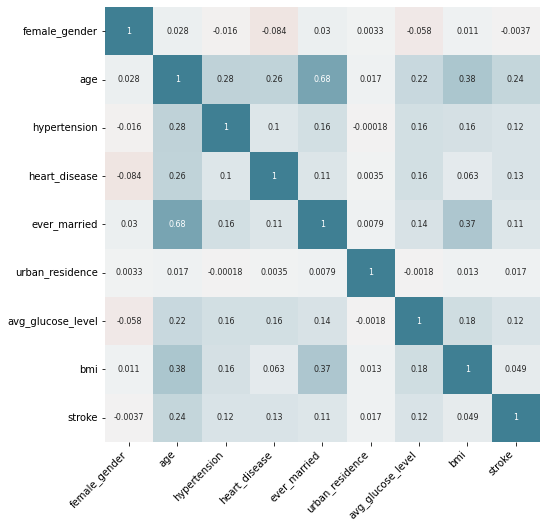

In [41]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

<AxesSubplot:>

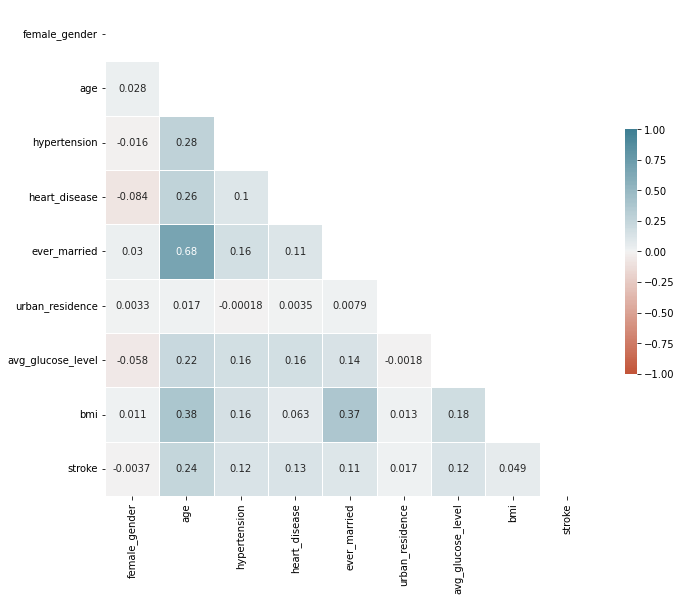

In [42]:
# A continuación se muestra un mapa de calor más amigable.
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(20, 220, n=200)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


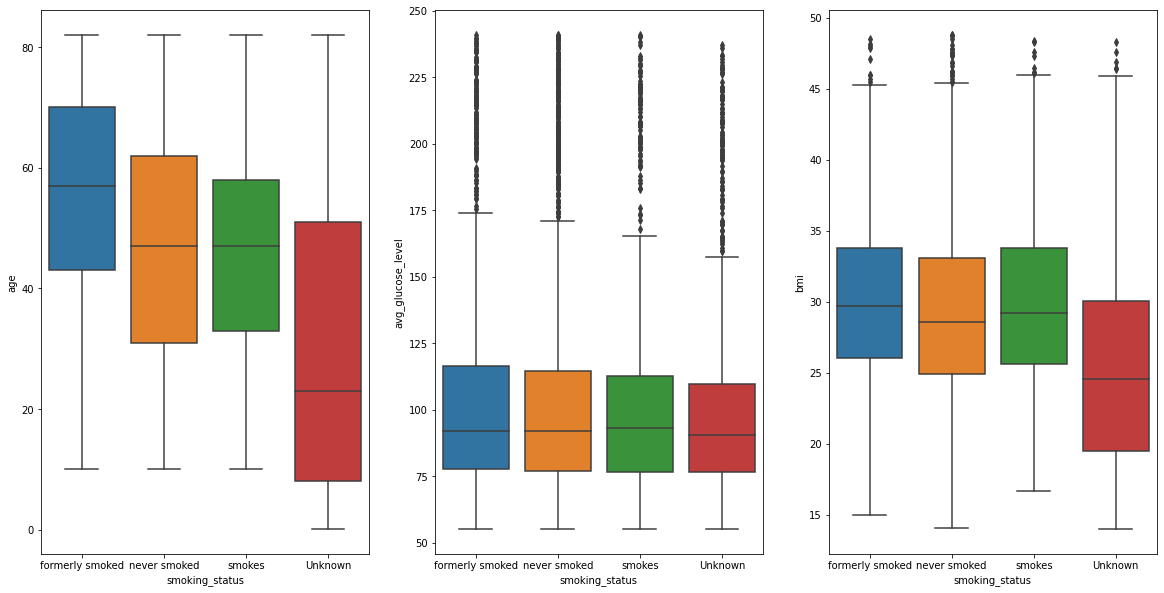

In [43]:
#Se crea un grafico para visualizar la edad, nivel de glucosa e imc; de acuerdo a su status de fumador.
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

plt.subplot(1,3,1)
sns.boxplot(x='smoking_status', y='age', data=df)
plt.ylim()

plt.subplot(1,3,2)
sns.boxplot(x='smoking_status', y='avg_glucose_level', data=df)
plt.ylim()

plt.subplot(1,3,3)
sns.boxplot(x='smoking_status', y='bmi', data=df)
plt.ylim()

plt.show()

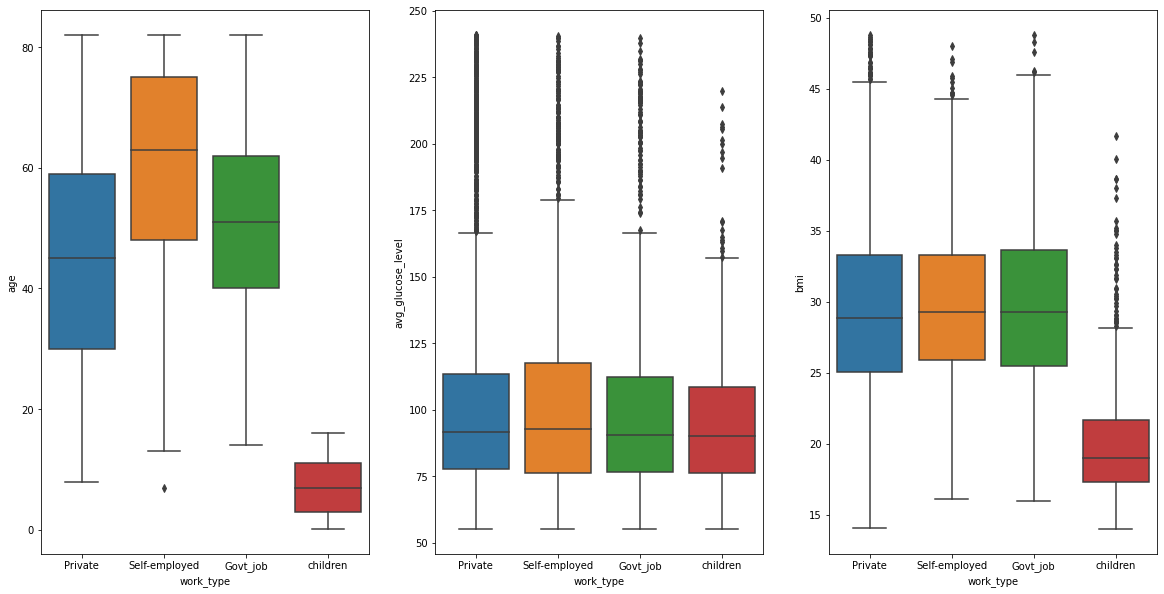

In [44]:
#Se crea un grafico para visualizar la edad, nivel de glucosa e imc; de acuerdo a su tipo de trabajo.
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

plt.subplot(1,3,1)
sns.boxplot(x='work_type', y='age', data=df)
plt.ylim()

plt.subplot(1,3,2)
sns.boxplot(x='work_type', y='avg_glucose_level', data=df)
plt.ylim()

plt.subplot(1,3,3)
sns.boxplot(x='work_type', y='bmi', data=df)
plt.ylim()

plt.show()

## Se eliminan Outliers

In [45]:
#Se visuliza a los menores de 16 años que trabajan
df_menor16 = (df[df['age']<16]) 
df_menor16.work_type.value_counts()

children         662
Private           50
Self-employed      8
Govt_job           2
Name: work_type, dtype: int64

+ Se encontraron 60 menores de 16 años que se encuentran trabajando.

In [46]:
#Se elimina outliers de Edad por su trabajo
indexNames = df[ (df['age'] < 16) & (df['work_type'] == 'Private') ].index 
df.drop(indexNames,inplace=True) 
indexNames = df[ (df['age'] < 16) & (df['work_type'] == 'Self-employed') ].index 
df.drop(indexNames,inplace=True) 
indexNames = df[ (df['age'] < 16) & (df['work_type'] == 'Govt_job') ].index 
df.drop(indexNames,inplace=True)

In [47]:
#Observamos a los menores de 18 años(con edad legal) que fuman o han sido sumadores y los tratamos.
df_menor16 = (df[df['age']<18]) 
df_menor16.smoking_status.value_counts()

Unknown            640
never smoked        96
formerly smoked     19
smokes               8
Name: smoking_status, dtype: int64

In [48]:
#Se elimina outliers de Edad por su status de fumador
indexNames = df[ (df['age'] < 18) & (df['smoking_status'] == 'formerly smoked') ].index 
df.drop(indexNames,inplace=True)

Se elimina a los antiguos fumadores menores de 18 años

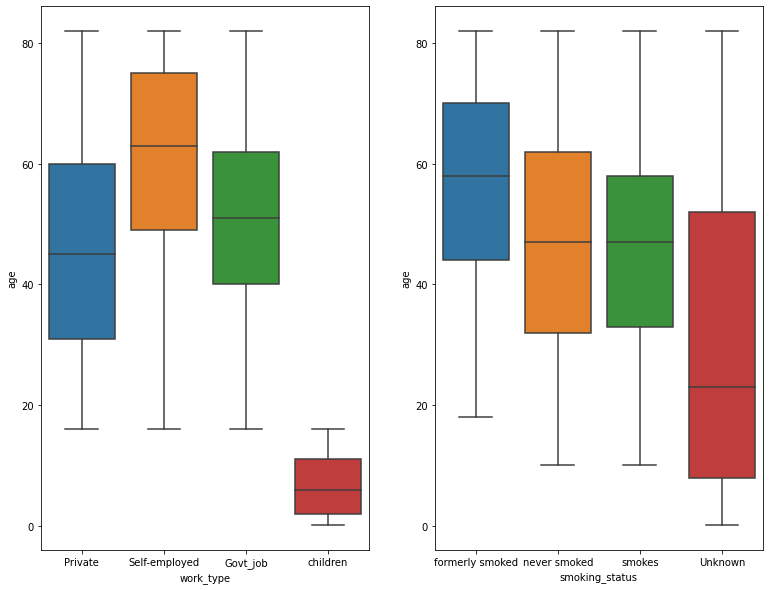

In [49]:
#Se crea un grafico para visualizar la edad, nivel de glucosa e imc; de acuerdo a su tipo de trabajo. Despues de haber tratado con los outliers, para ver los cambios.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

plt.subplot(1,3,1)
sns.boxplot(x='work_type', y='age', data=df)
plt.ylim()

plt.subplot(1,3,2)
sns.boxplot(x='smoking_status', y='age', data=df)
plt.ylim()

plt.show()

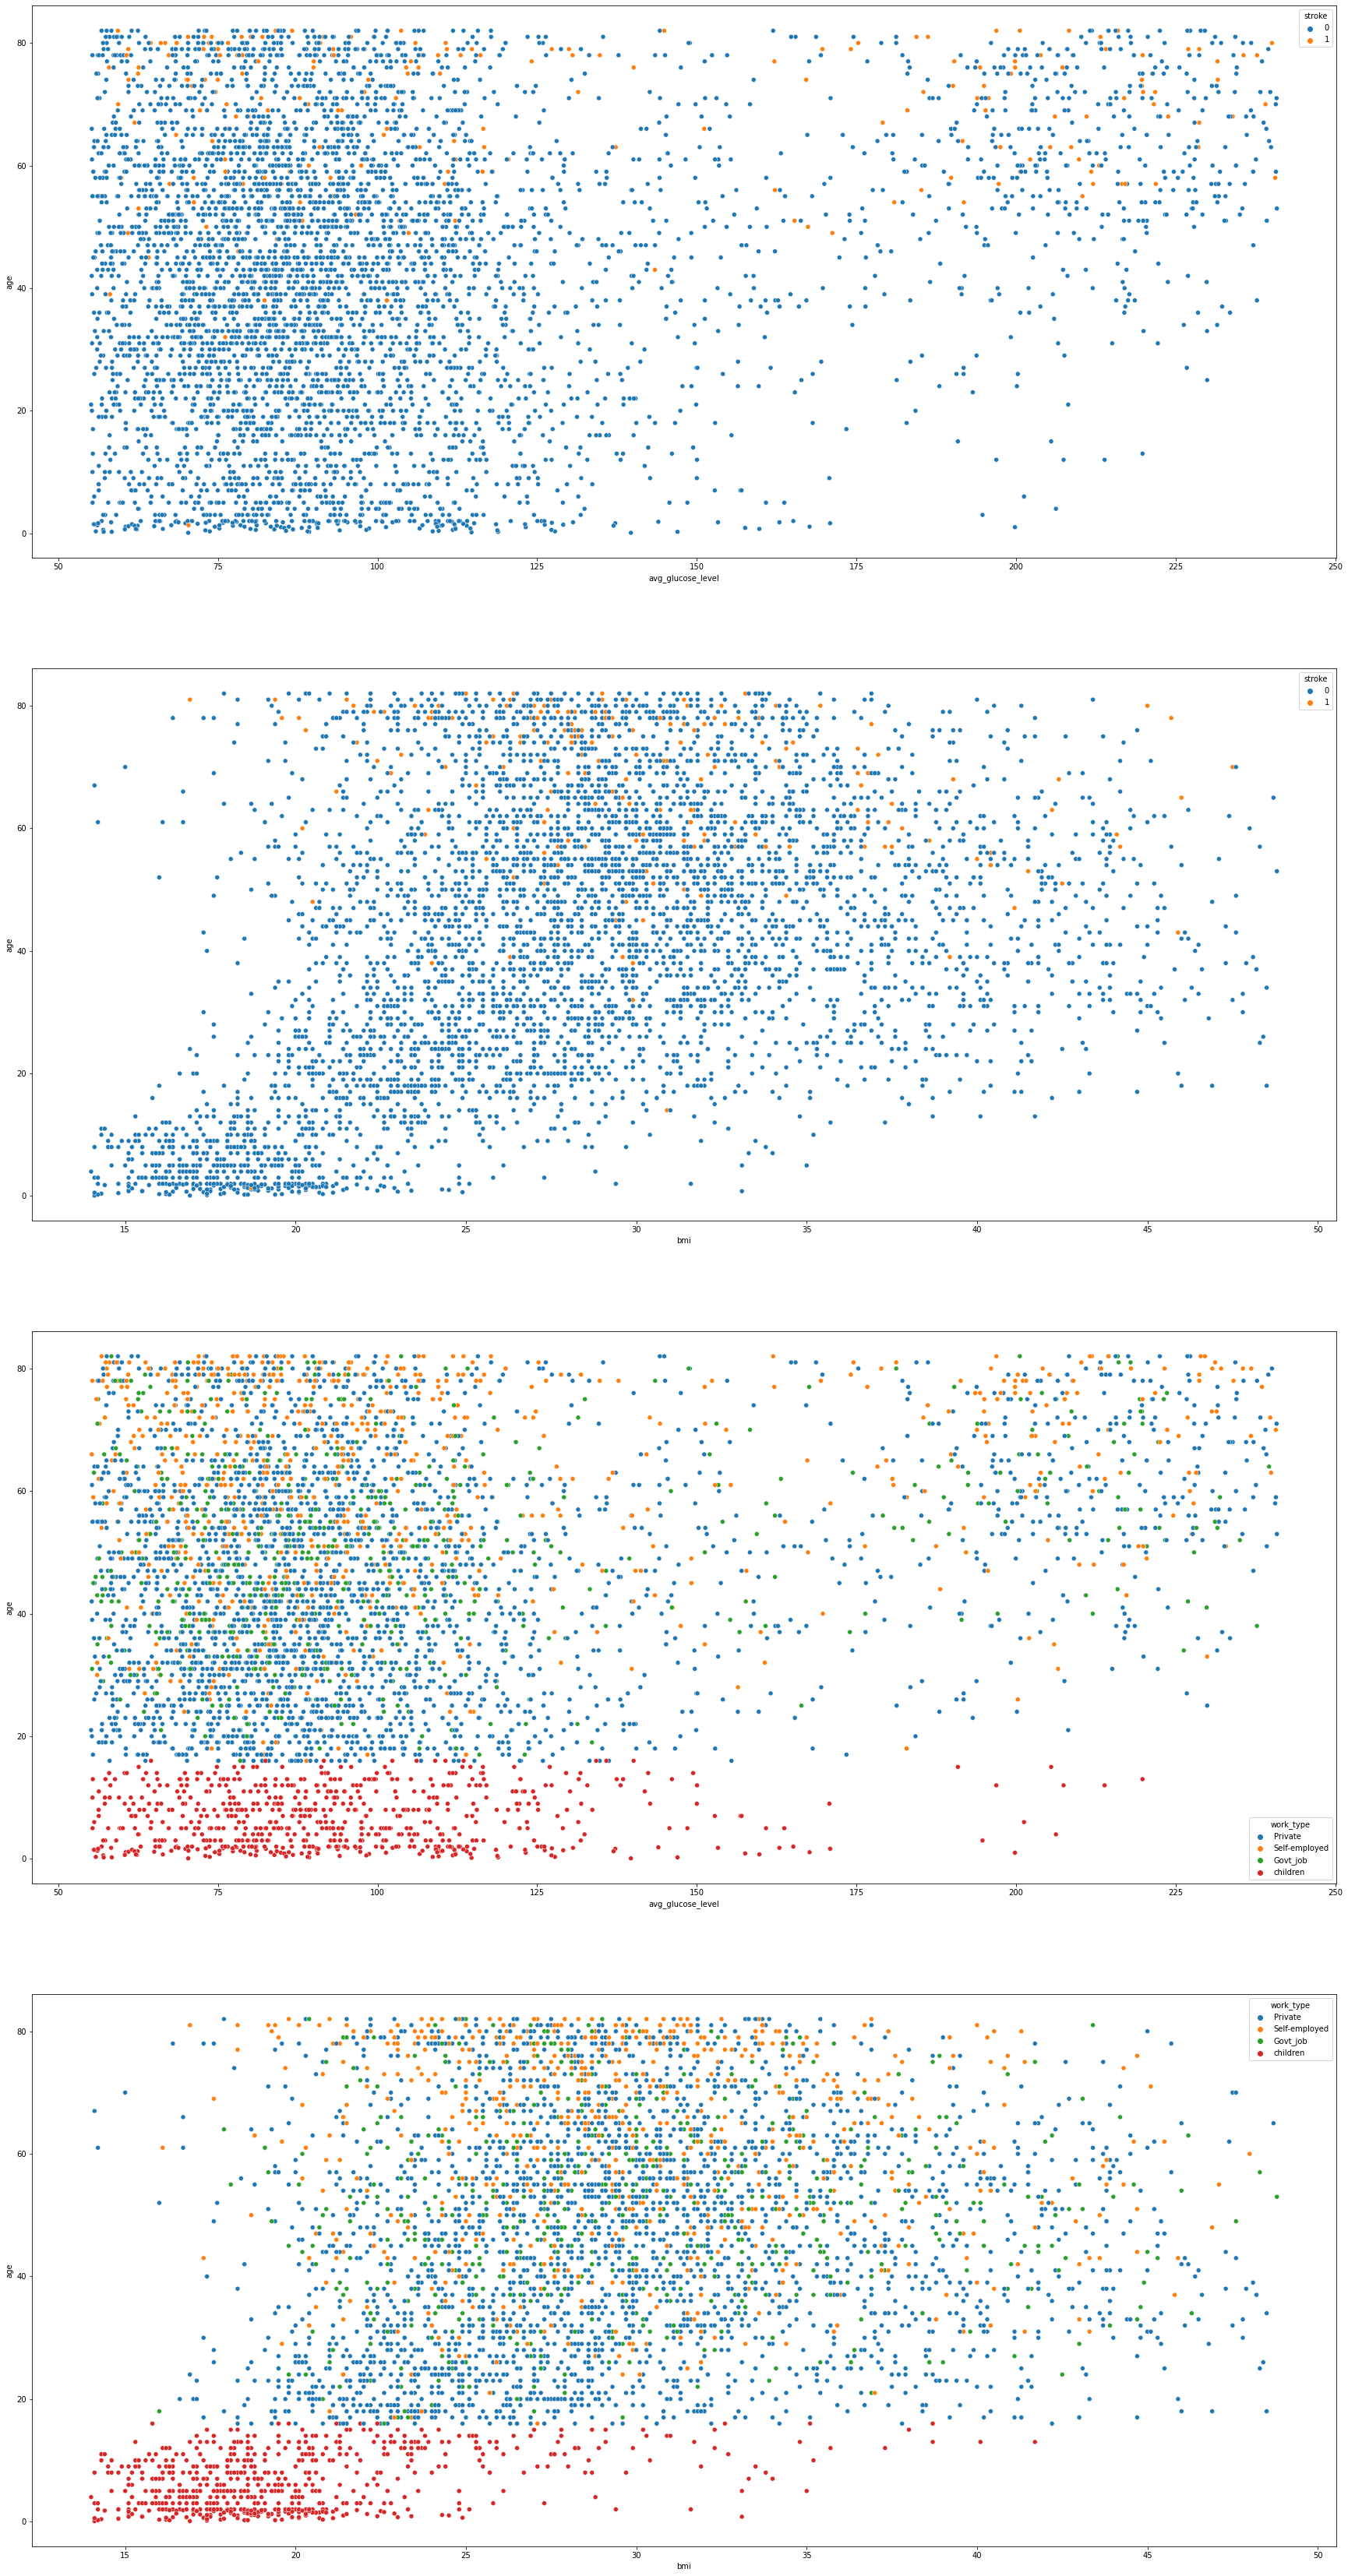

In [50]:
#Se crean los siguientes graficos para poder observar mejor las correlaciones.
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(30, 60))

#Grafico para visualizar si un paciente sufrió de un ictus segun la edad y nivel de glucosa.
plt.subplot(4,1,1)
sns.scatterplot(x="avg_glucose_level", y="age", data=df, hue="stroke")
plt.ylim()

#Grafico para visualizar si un paciente sufrió de un ictus segun la edad y su indice de masa corporal.
plt.subplot(4,1,2)
sns.scatterplot(x="bmi", y="age", data=df, hue="stroke")
plt.ylim()

#Grafico para medir la rrelacion del nivel de glucosa con la edad y el tipo de trabajo del paciente.
plt.subplot(4,1,3)
sns.scatterplot(x="avg_glucose_level", y="age", data=df, hue="work_type")
plt.ylim()

#Grafico para medir la rrelacion del indice de masa corporal con la edad y el tipo de trabajo del paciente.
plt.subplot(4,1,4)
sns.scatterplot(x="bmi", y="age", data=df, hue="work_type")
plt.ylim()

plt.show()

### Creación de colummnas

In [51]:
# Se crea la lista de las condiciones de la columna.
conditions = [
    (df['age'] <= 2),
    (df['age'] > 2) & (df['age'] <= 25),
    (df['age'] > 25) & (df['age'] <= 45),
    (df['age'] > 45) & (df['age'] <= 60),
    (df['age'] > 60) & (df['age'] <= 70),
    (df['age'] > 70) & (df['age'] <= 77),
    (df['age'] > 77)
    ]

# Se les asigna nombres a las condiciones creadas
values = ['Infante', 'Juventud', 'Adultez_25a45', 'Adultez_45a60', "Vejez_60a70", "Vejez_70a77", "Vejez_mas77"]

# Se pone un nombre a la nueva columna
df['rangos_edad'] = np.select(conditions, values)

# Observamos en el Dataframe la nueva columna
df.head()

,female_gender,age,hypertension,heart_disease,ever_married,work_type,urban_residence,avg_glucose_level,bmi,smoking_status,stroke,rangos_edad
0,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,Vejez_60a70
1,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,Vejez_mas77
2,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,Adultez_45a60
3,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,Vejez_mas77
4,0,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1,Vejez_mas77


In [52]:
#Visualizamos el conteo por las nuevas condiciones.
df.rangos_edad.value_counts()

Adultez_25a45    1283
Adultez_45a60    1137
Juventud         1002
Vejez_60a70       571
Vejez_mas77       362
Vejez_70a77       327
Infante           168
Name: rangos_edad, dtype: int64

In [53]:
# Se crea la lista de las condiciones de la columna.
conditions = [
    (df['bmi'] <= 18.5),
    (df['bmi'] > 18.5) & (df['bmi'] <= 24.9),
    (df['bmi'] > 24.9) & (df['bmi'] <= 29.9),
    (df['bmi'] > 29.9) & (df['bmi'] <= 34.9),
    (df['bmi'] > 34.9) & (df['bmi'] <= 39.9),
    (df['bmi'] > 39.9)
    ]

# Se les asigna nombres a las condiciones creadas
values = ['Bajo_peso', 'Normal', 'Sobrepeso', 'Obesidad_1', "Obesidad_2", "Obesidad_3"]

# Se pone un nombre a la nueva columna
df['IMC'] = np.select(conditions, values)

# Observamos en el Dataframe la nueva columna
df.head()

,female_gender,age,hypertension,heart_disease,ever_married,work_type,urban_residence,avg_glucose_level,bmi,smoking_status,stroke,rangos_edad,IMC
0,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,Vejez_60a70,Obesidad_2
1,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,Vejez_mas77,Obesidad_1
2,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,Adultez_45a60,Obesidad_1
3,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,Vejez_mas77,Normal
4,0,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1,Vejez_mas77,Sobrepeso


In [54]:
#Visualizamos el conteo por las nuevas condiciones.
df.IMC.value_counts()

Sobrepeso     1457
Normal        1189
Obesidad_1    1076
Obesidad_2     496
Bajo_peso      322
Obesidad_3     310
Name: IMC, dtype: int64

In [55]:
# Se crea la lista de las condiciones de la columna.
conditions = [
    (df['avg_glucose_level'] <= 100),
    (df['avg_glucose_level'] > 100) & (df['avg_glucose_level'] <= 125),
    (df['avg_glucose_level'] > 125)
    ]

# Se les asigna nombres a las condiciones creadas
values = ['Normal', 'Prediabetico', 'Diabetico']

# Se pone un nombre a la nueva columna
df['Diabetes'] = np.select(conditions, values)

# Observamos en el Dataframe la nueva columna
df.head()

,female_gender,age,hypertension,heart_disease,ever_married,work_type,urban_residence,avg_glucose_level,bmi,smoking_status,stroke,rangos_edad,IMC,Diabetes
0,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,Vejez_60a70,Obesidad_2,Diabetico
1,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,Vejez_mas77,Obesidad_1,Prediabetico
2,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,Adultez_45a60,Obesidad_1,Diabetico
3,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,Vejez_mas77,Normal,Diabetico
4,0,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1,Vejez_mas77,Sobrepeso,Diabetico


In [56]:
#Visualizamos el conteo por las nuevas condiciones.
df.Diabetes.value_counts()

Normal          3004
Prediabetico     943
Diabetico        903
Name: Diabetes, dtype: int64

In [57]:
#Se clasifican las variables categoricas.
categoricas = ["work_type","smoking_status"]

In [58]:
#Se crea un Dataframe con los cambios realizados
df=df[["female_gender", "age", "rangos_edad", "hypertension", "heart_disease", "ever_married", "work_type", "urban_residence", "avg_glucose_level", "Diabetes", "bmi", "IMC", "smoking_status", "stroke"]]

## 4. MODELOS PREDICTIVOS

 + TRANSFORMACION DATOS

In [59]:
#Eliminamos las columnas que no usaremos.
df=df.drop((["rangos_edad", "Diabetes", "IMC"]), axis=1)

In [60]:
#Separamos la variable a predecir.
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [61]:
#Observamos la informacion del Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4850 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   female_gender      4850 non-null   int64  
 1   age                4850 non-null   float64
 2   hypertension       4850 non-null   int64  
 3   heart_disease      4850 non-null   int64  
 4   ever_married       4850 non-null   int64  
 5   work_type          4850 non-null   object 
 6   urban_residence    4850 non-null   int64  
 7   avg_glucose_level  4850 non-null   float64
 8   bmi                4850 non-null   float64
 9   smoking_status     4850 non-null   object 
 10  stroke             4850 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 583.7+ KB


+ DATOS DESBALANCEADOS

Probamos con distintos metodos de balanceo

In [62]:
#Clasificamos las variables numericas.
numericas_noStroke =  ["female_gender", "age", "hypertension", "heart_disease", "ever_married", "urban_residence", "avg_glucose_level", "bmi"]

In [63]:
#Estandarizacion y binarizacion de las variables cuantitativas y cualitativas.
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer_numerico = ("transformer_numerico", MinMaxScaler(), numericas_noStroke)
transformer_categorico = ("transformer_categorico", OneHotEncoder(), categoricas)

transformer = ColumnTransformer([transformer_categorico, transformer_numerico], remainder="passthrough")

In [64]:
#Se aplica el transformer
X = transformer.fit_transform(X)

In [65]:
#Creamos un dataframe para observarlo
X = pd.DataFrame(X, columns = transformer.get_feature_names_out())

In [66]:
#Observamos lo que se encuentra dentro de "X"
X.head()

,transformer_categorico__work_type_Govt_job,transformer_categorico__work_type_Private,transformer_categorico__work_type_Self-employed,transformer_categorico__work_type_children,transformer_categorico__smoking_status_Unknown,transformer_categorico__smoking_status_formerly smoked,transformer_categorico__smoking_status_never smoked,transformer_categorico__smoking_status_smokes,transformer_numerico__female_gender,transformer_numerico__age,transformer_numerico__hypertension,transformer_numerico__heart_disease,transformer_numerico__ever_married,transformer_numerico__urban_residence,transformer_numerico__avg_glucose_level,transformer_numerico__bmi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.816895,0.0,1.0,1.0,1.0,0.934478,0.649425
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.975586,0.0,1.0,1.0,0.0,0.273501,0.531609
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.597168,0.0,0.0,1.0,1.0,0.625121,0.586207
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.963379,1.0,0.0,1.0,0.0,0.640681,0.287356
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.987793,0.0,0.0,1.0,1.0,0.705772,0.431034


In [67]:
#Vemos los indices dentro de cada transformer
transformer.output_indices_

{'transformer_categorico': slice(0, 8, None),
 'transformer_numerico': slice(8, 16, None),
 'remainder': slice(0, 0, None)}

In [68]:
#Se separa en train y test haciendo un split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2 , stratify = y )

In [69]:
#Observamos los datos con los que contamos hasta el momento, se encuentran desbalanceados.
y_train.value_counts()

0    3690
1     190
Name: stroke, dtype: int64

In [70]:
#Despues de probar con otros metodos de balanceo, optamos por el metodo de SMOTE. 
from imblearn.over_sampling import SMOTE

In [71]:
#Se aplica el SMOTE, después de importar su librería
smo = SMOTE(random_state=42, sampling_strategy=0.25)
X_train,y_train = smo.fit_resample(X_train,y_train)

In [72]:
#Se imprtan las librerias de los modelos de prediccion de clasificacion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

#Librerías de los modelos de ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

#Librerías de xgb
import xgboost as xgb
import lightgbm 
import catboost
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import multiprocessing
from multiprocessing import Pool
from sklearn.model_selection import RepeatedKFold

In [73]:
#Librerías de las metricas que se usarán.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [74]:
#Empezamos con la elaboracion de la matriz de confusion y metricas de cada modelo de prediccion para comparar los resultados.
def train_evaluate(nombre_modelo, modelo):
    mod=modelo(class_weight= "balanced")#No todos los modelos tienen como atributo a class_weight
    mod.fit(X_train, y_train)
    
    y_predict = mod.predict(X_test)
        
    #Matriz de confusion
    print(nombre_modelo)
    print()
    print(f"Matriz de Confusión:")
    print()
    
    con_matrix = confusion_matrix(y_test, y_predict)
    classes_names = ['False', 'True']
    con_matrix_ConfusionMatrix = pd.DataFrame(con_matrix, index=classes_names, columns=classes_names)

    sns.heatmap(con_matrix_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
    plt.title("Decision Tree Confusion Matrix")
    plt.tight_layout()
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.show()
            
    #Metricas de test  
    
    accur = accuracy_score(y_test, y_predict)
    preci = precision_score(y_test, y_predict)
    recal = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    class_repor = classification_report(y_test, y_predict)
    
    
    #Metricas de train
    y_pred_train= mod.predict(X_train)

    accur_train = accuracy_score(y_train, y_pred_train)
    preci_train = precision_score(y_train, y_pred_train)
    recal_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    
    print()
    print(f"Recall: {recal}")
    print(f"Precision: {preci}")
    print(f"F1_score: {f1}")
    print(f"Accuracy: {accur}")
    print()
    print("***********************************************************************")
    print()
    print(f"recall_score_train: {recal_train}")
    print(f"precision_score_train: {preci_train}")
    print(f"f1_score_train: {f1_train}")
    print(f"accuracy_score_train: {accur_train}")
    print()
    print(f"Reporte de Clasificación:")
    print()
    print(class_repor)
    print()


SVC

Matriz de Confusión:



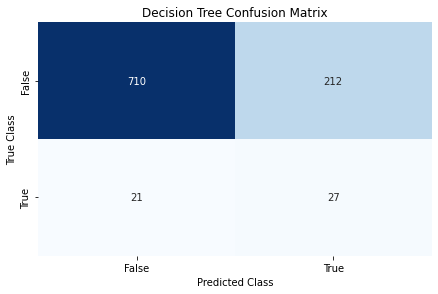


Recall: 0.5625
Precision: 0.11297071129707113
F1_score: 0.18815331010452963
Accuracy: 0.7597938144329897

***********************************************************************

recall_score_train: 0.9392624728850325
precision_score_train: 0.5261239368165249
f1_score_train: 0.6744548286604362
accuracy_score_train: 0.818733738074588

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       922
           1       0.11      0.56      0.19        48

    accuracy                           0.76       970
   macro avg       0.54      0.67      0.52       970
weighted avg       0.93      0.76      0.83       970


LogisticRegression

Matriz de Confusión:



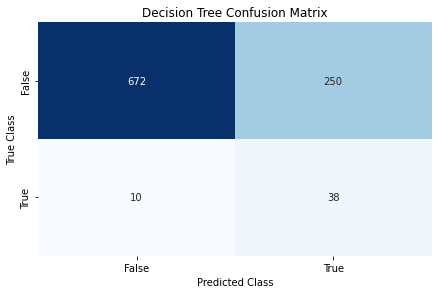


Recall: 0.7916666666666666
Precision: 0.13194444444444445
F1_score: 0.2261904761904762
Accuracy: 0.7319587628865979

***********************************************************************

recall_score_train: 0.8427331887201736
precision_score_train: 0.43898305084745765
f1_score_train: 0.5772659732540862
accuracy_score_train: 0.7532523850823938

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       922
           1       0.13      0.79      0.23        48

    accuracy                           0.73       970
   macro avg       0.56      0.76      0.53       970
weighted avg       0.94      0.73      0.81       970


[12:44:21] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagg

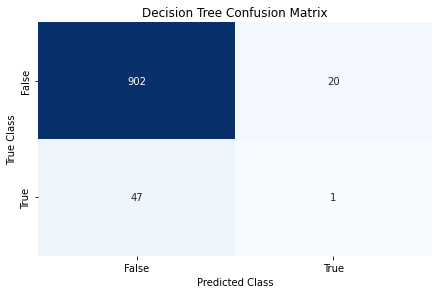


Recall: 0.020833333333333332
Precision: 0.047619047619047616
F1_score: 0.028985507246376812
Accuracy: 0.9309278350515464

***********************************************************************

recall_score_train: 0.9848156182212582
precision_score_train: 1.0
f1_score_train: 0.9923497267759563
accuracy_score_train: 0.9969644405897659

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       922
           1       0.05      0.02      0.03        48

    accuracy                           0.93       970
   macro avg       0.50      0.50      0.50       970
weighted avg       0.91      0.93      0.92       970


RandomForestClassifier

Matriz de Confusión:



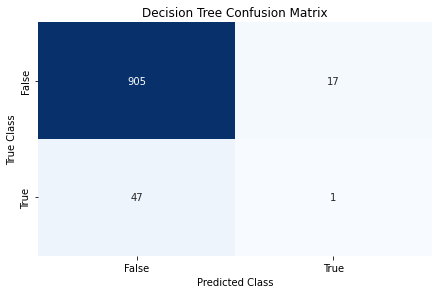


Recall: 0.020833333333333332
Precision: 0.05555555555555555
F1_score: 0.030303030303030304
Accuracy: 0.934020618556701

***********************************************************************

recall_score_train: 1.0
precision_score_train: 1.0
f1_score_train: 1.0
accuracy_score_train: 1.0

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       922
           1       0.06      0.02      0.03        48

    accuracy                           0.93       970
   macro avg       0.50      0.50      0.50       970
weighted avg       0.91      0.93      0.92       970


LGBMClassifier

Matriz de Confusión:



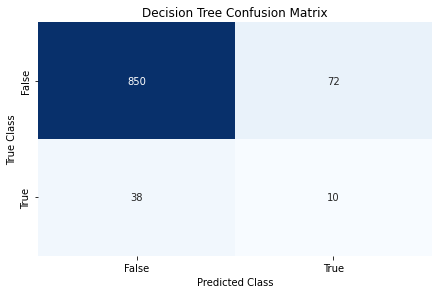


Recall: 0.20833333333333334
Precision: 0.12195121951219512
F1_score: 0.15384615384615383
Accuracy: 0.8865979381443299

***********************************************************************

recall_score_train: 0.9967462039045553
precision_score_train: 0.87774594078319
f1_score_train: 0.9334687658710005
accuracy_score_train: 0.9715958369470945

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       922
           1       0.12      0.21      0.15        48

    accuracy                           0.89       970
   macro avg       0.54      0.57      0.55       970
weighted avg       0.92      0.89      0.90       970




In [75]:
#Se imprimen los resultados, con los modelos que admiten el atributo "class_weight".

#train_evaluate("KNeighborsClassifier",KNeighborsClassifier )
train_evaluate("SVC",SVC )
train_evaluate("LogisticRegression",LogisticRegression )
#train_evaluate("LinearDiscriminantAnalysis",LinearDiscriminantAnalysis )
#train_evaluate("GaussianNB",GaussianNB )

#train_evaluate("GradientBoostingClassifier",GradientBoostingClassifier )
train_evaluate("XGBClassifier",XGBClassifier )
train_evaluate("RandomForestClassifier",RandomForestClassifier )
#train_evaluate("AdaBoostClassifier",AdaBoostClassifier )

train_evaluate("LGBMClassifier",LGBMClassifier )
#train_evaluate("CatBoostClassifier",CatBoostClassifier )

In [76]:
# Ejemplo cross-validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Modelo XGBoostClassifier

+ Tuning de hiperparametros con GridSearchCV,la cual hace una búsqueda exhaustiva sobre un conjunto de valores previamente definidos por el usuario.

In [77]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [700,750,800],
              'max_depth'     : [3],
              'subsample'     : [1],
              'learning_rate' : [0.01],
              'reg_alpha'     : [0.1,0.5,0.75],
              'reg_lambda'    : [16],
              "min_child_weight" : [15,20,25],
              'scale_pos_weight' : [5]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = XGBClassifier(random_state=42),
        param_grid = param_grid,
        scoring    = 'recall',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, # nos quedamos con 200 en cross validation después de hacer pruebas con varios valores
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_reg_alpha,param_reg_lambda,param_scale_pos_weight,param_subsample,mean_test_score,mean_train_score
6,0.01,3,15,800,0.1,16,5,1,0.911163,0.945233
8,0.01,3,15,800,0.75,16,5,1,0.910088,0.944419
1,0.01,3,15,700,0.5,16,5,1,0.910076,0.946316
19,0.01,3,25,700,0.5,16,5,1,0.910071,0.941165
4,0.01,3,15,750,0.5,16,5,1,0.908995,0.945232
3,0.01,3,15,750,0.1,16,5,1,0.908995,0.945232
9,0.01,3,20,700,0.1,16,5,1,0.908989,0.943335
10,0.01,3,20,700,0.5,16,5,1,0.908989,0.943064
11,0.01,3,20,700,0.75,16,5,1,0.908989,0.943064
2,0.01,3,15,700,0.75,16,5,1,0.908989,0.946316


In [78]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 15, 'n_estimators': 800, 'reg_alpha': 0.1, 'reg_lambda': 16, 'scale_pos_weight': 5, 'subsample': 1} : 0.9111633372502939 recall


In [79]:
#Se guardan los mejores estimadores para el modelo.
modelo_final_XGBClassifier = grid.best_estimator_

* Se guarda modeloXGB y el transformer

In [80]:
#Se importa pickle para guardar el modelo y el transformer
import pickle
pickle.dump(modelo_final_XGBClassifier, open('modelo_final_XGBClassifier.pkl', 'wb'))
pickle.dump(transformer, open('transformer.pkl', 'wb'))

* Se prueba que el modelo está bien guardado

In [81]:
modeloprueba = pickle.load(open('modelo_final_XGBClassifier.pkl', 'rb'))

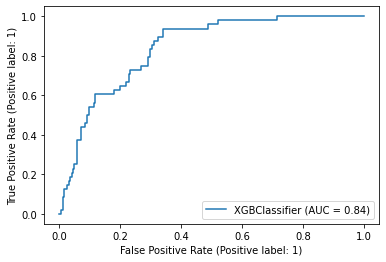

In [82]:
#Se importa librerias de la curva roc y se crea para el test y train.
from sklearn.metrics import plot_roc_curve
from sklearn import  metrics, model_selection

metrics.plot_roc_curve(modeloprueba, X_test, y_test)
plt.show()

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=15,
              missing=nan, monotone_constraints='()', n_estimators=800,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0.1, reg_lambda=16, ...)

Matriz de Confusión:




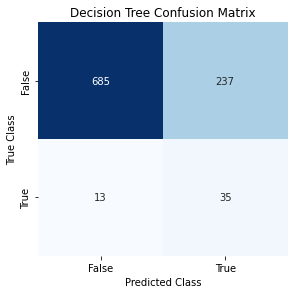

In [83]:
#Creamos matriz de confusion.
y_predict = modelo_final_XGBClassifier.predict(X_test)

print(modelo_final_XGBClassifier)
print()
#Matriz de confusion
print(f"Matriz de Confusión:")
print()
print()
con_matrix = confusion_matrix(y_test, y_predict)
classes_names = ['False', 'True']
con_matrix_ConfusionMatrix = pd.DataFrame(con_matrix, index=classes_names, columns=classes_names)
plt.figure(figsize=(4, 4))
sns.heatmap(con_matrix_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Decision Tree Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()



## Modelo LGBMClassifier - Modelo final

En un primer momento probamos con varios modelos predictivos y nos dimos cuenta que los modelos no aprendian.Aunque, nos daba un accuracy(Exactitud) muy alto predecia que todos los pacientes estaban sanos;por ello, nos dimos cuenta que la metrica mas importante deberia ser el recall(Sensibilidad). El recall es la proporción de casos positivos que fueron correctamente identificadas por el algoritmo, asi nos aseguramos de no predecir pacientes que tienen posibilidad de tener un ictus como pacientes sanos. 

Nos dimos cuenta que nuestra base de datos se encontraba desbalanceada;por lo que, aplicamos el metodo de balanceo SMOTE para lograr balancear nuestros datos. Pero, depués de volver a realizar la comparacion de los resultados elegimos utilizar modelos de prediccion de ensemble; ya que, se crean utilizando varios modelos de prediccion a la vez. De entre ellos, elegimos XGBoost Classifier y LGBM Classifier. Finalmente decidimos quedarnos con el modelo LGBM porque era el que nos daba los mejores resultados. 

Procedimos a realizar el tunning de hyperparametres para poder mejorar aun mas las metricas. Utlizamos el RandomizedSearch y el Grid search para encontrar los mejores hiperparametros.

In [84]:
#Se importa librería de RandomSearch
from sklearn.model_selection import RandomizedSearchCV

### Parametros LGBM Classifier:

Para mejorar la precision utilizamos "num_leaves y max_depth", para reducir el overfiting agregamos los regularizadores de pesos de variables "reg_alpha y reg_lambda", asi como el "max_bin". Este modelo nos da como unos de sus parametros el "boosting_type", el cual tiene tres opciones de la cual eliegimos trabajar con el "gbdt" (gradient boost desicion tree). Tambien, utilizamos el parametro "scale_pos_weight" que nos permitia balancear el peso de las varibles.

In [85]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = { 'max_depth' : [ 3],
              'max_bin': [50],
              'learning_rate' : [0.01],
              'n_estimators' : [800], 
              'num_leaves': [31], # large num_leaves helps improve accuracy but might lead to over-fitting 
               "bagging_fraction" : [0.8], 
               "bagging_frequency" : [1],
              'subsample' : [0.7], 
              'colsample_bytree' :[0.8], 
               'reg_alpha' : [0], 
               'reg_lambda' : [0.01],
               "min_child_weight" : [15], 
               'scale_pos_weight' : [10] } 
# Búsqueda por grid search con validación cruzada
# =============================================================================
grid = RandomizedSearchCV(
        estimator  = LGBMClassifier(random_state=42, n_jobs=2,boosting_type= 'gbdt'),
        param_distributions = param_grid,
        scoring    = 'recall',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         =5,
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(50)

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.7 will be ignored. Current value: bagging_fraction=0.8


,param_subsample,param_scale_pos_weight,param_reg_lambda,param_reg_alpha,param_num_leaves,param_n_estimators,param_min_child_weight,param_max_depth,param_max_bin,param_learning_rate,param_colsample_bytree,param_bagging_frequency,param_bagging_fraction,mean_test_score,mean_train_score
0,0.7,10,0.01,0,31,800,15,3,50,0.01,0.8,1,0.8,0.95886,0.983732


Después de una busqueda exhaustiva de los mejores hiperparametros para mejorar los resultados de nuestras metricas, elegimos las que nos daba un recall de 0.95 sin bajar los valores de las demas. Y se procedió a guardar el modelo con sus mejores estimadores.

In [86]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'subsample': 0.7, 'scale_pos_weight': 10, 'reg_lambda': 0.01, 'reg_alpha': 0, 'num_leaves': 31, 'n_estimators': 800, 'min_child_weight': 15, 'max_depth': 3, 'max_bin': 50, 'learning_rate': 0.01, 'colsample_bytree': 0.8, 'bagging_frequency': 1, 'bagging_fraction': 0.8} : 0.9588601645123385 recall


In [87]:
#Se guarda los estimadores
modelo_final_LGBMClassifier = grid.best_estimator_

In [88]:
#Se guarda el modelo en pickle.
import pickle
pickle.dump(modelo_final_LGBMClassifier, open('modelo_final_LGBMClassifier_.pkl', 'wb'))
modeloprueba1 = pickle.load(open('modelo_final_LGBMClassifier_.pkl', 'rb'))

### Curva ROC

La curva ROC es una representación gráfica de la sensibilidad(tasa de verdaderos positivos) frente a la especificidad (tasa de verdaderos negativos) para un sistema clasificador binario según se varía el umbral de discriminación. 

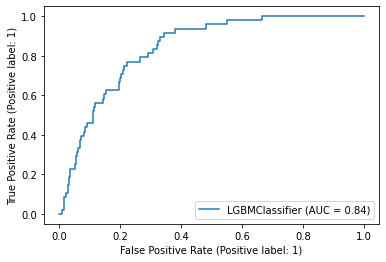

In [89]:
#Se importa librerias de la curva roc y se crea para el test y train.
from sklearn.metrics import plot_roc_curve
from sklearn import  metrics, model_selection

metrics.plot_roc_curve(modeloprueba1, X_test, y_test)
plt.show()

LGBMClassifier(bagging_fraction=0.8, bagging_frequency=1, colsample_bytree=0.8,
               learning_rate=0.01, max_bin=50, max_depth=3, min_child_weight=15,
               n_estimators=800, n_jobs=2, random_state=42, reg_alpha=0,
               reg_lambda=0.01, scale_pos_weight=10, subsample=0.7)

Matriz de Confusión:




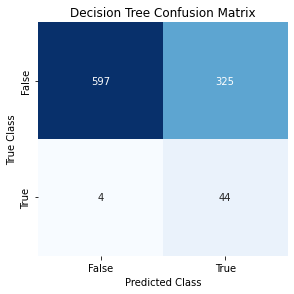

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.7 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.7 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.7 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.7 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.7 will be ignored. Current value: bagging_fraction=0.8


In [90]:
#Creamos la matriz de confunsion.
y_predict = modelo_final_LGBMClassifier.predict(X_test)

print(modelo_final_LGBMClassifier)
print()


#Matriz de confusion
print(f"Matriz de Confusión:")
print()
print()
con_matrix = confusion_matrix(y_test, y_predict)
classes_names = ['False', 'True']
con_matrix_ConfusionMatrix = pd.DataFrame(con_matrix, index=classes_names, columns=classes_names)
plt.figure(figsize=(4, 4))
sns.heatmap(con_matrix_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Decision Tree Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

